In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_excel("C:/Users/chapa/Documents/Capstone/almostdone.xlsx")

In [4]:
data

,Date,EPS,Book Value,COF,Dividend,inflation,Remittance Growth Rate(%),Open,High,Low,...,MA_10,Bollinger_Middle,Bollinger_Upper,Bollinger_Lower,MACD,Signal_Line,polarity,subjectivity,MA_30,Compound Sensitivity
0,2018-04-27,46.70,210.00,4.63,0.48,6.00,7.0,1050.0,1050.0,1020.0,...,1030.10,1001.550,1074.016475,929.083525,9.680262,2.875483,0.000000,0.000000,1004.400000,0.0000
1,2018-04-28,46.70,210.00,4.63,0.48,6.00,7.0,1050.0,1050.0,1020.0,...,1030.10,1001.550,1074.016475,929.083525,9.680262,2.875483,0.000000,0.000000,1004.400000,0.0000
2,2018-04-29,46.70,210.00,4.63,0.48,6.00,7.0,1015.0,1020.0,1002.0,...,1032.60,1005.050,1072.865854,937.234146,8.143550,3.929096,0.000000,0.000000,1004.400000,0.0000
3,2018-04-30,46.70,210.00,4.63,0.48,6.00,7.0,1015.0,1020.0,1002.0,...,1032.60,1005.050,1072.865854,937.234146,8.143550,3.929096,0.000000,0.000000,1004.400000,0.0000
4,2018-05-01,46.70,210.00,4.63,0.48,6.00,7.0,1015.0,1020.0,1002.0,...,1032.60,1005.050,1072.865854,937.234146,8.143550,3.929096,0.000000,0.000000,1004.400000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1978,2023-09-26,27.82,214.69,7.81,0.30,7.52,25.8,596.0,596.0,586.2,...,591.93,598.055,613.631197,582.478803,-4.659392,-3.511786,0.166667,0.522222,587.483333,0.9987
1979,2023-09-27,27.82,214.69,7.81,0.30,7.52,25.8,596.0,596.0,586.2,...,591.93,598.055,613.631197,582.478803,-4.659392,-3.511786,0.166667,0.522222,587.390000,0.9987
1980,2023-09-28,27.82,214.69,7.81,0.30,7.52,25.8,596.0,596.0,586.2,...,591.93,598.055,613.631197,582.478803,-4.659392,-3.511786,0.166667,0.522222,587.300000,0.9987
1981,2023-09-29,27.82,214.69,7.81,0.30,7.52,25.8,596.0,596.0,586.2,...,591.93,598.055,613.631197,582.478803,-4.659392,-3.511786,0.166667,0.522222,587.300000,0.9987


In [5]:
df = data[["Close"]].copy()

In [6]:
df.describe()

,Close
count,1983.000000
mean,915.198991
std,254.844244
min,580.000000
25%,740.000000
50%,844.000000
75%,1006.950000
max,1653.000000


ADF test to check if stationary



In [9]:
#Check if price is stationary

from statsmodels.tsa.stattools import adfuller
result = adfuller(data.Close.dropna())
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")

ADF Statistic: -1.320688670192634
p-value: 0.6196548781851703


Autocorrelation function


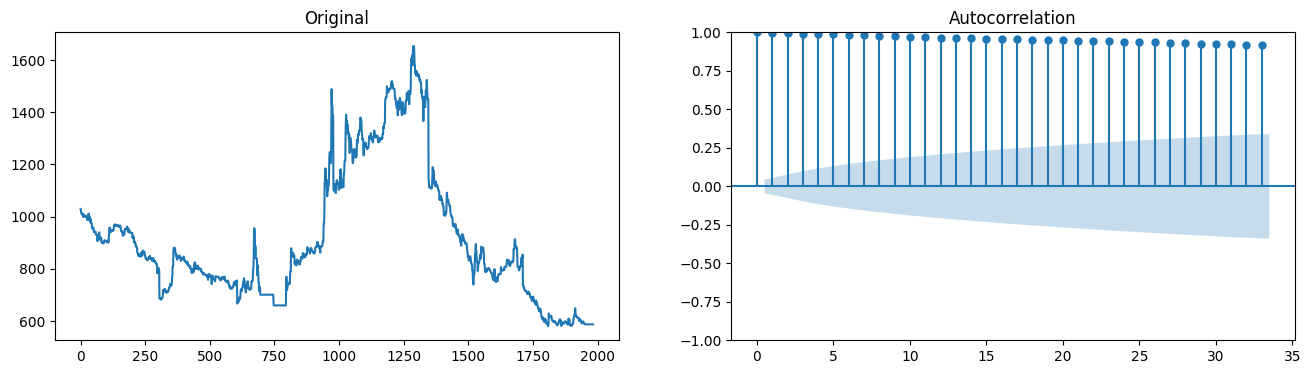

In [11]:
from statsmodels.graphics.tsaplots import plot_acf

fig, (ax1,ax2)= plt.subplots(1,2,figsize=(16,4))
ax1.plot(data.Close)
ax1.set_title("Original")
plot_acf(data.Close,ax=ax2);

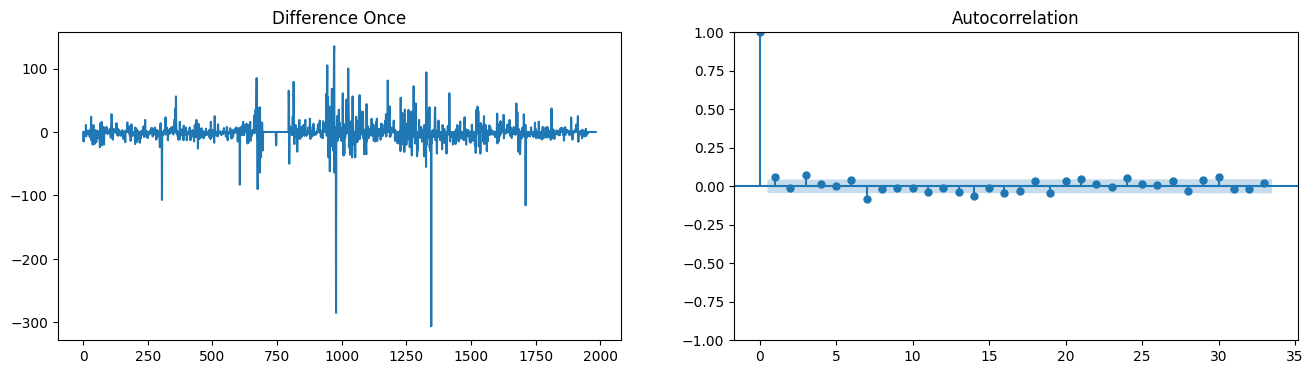

In [13]:
diff = data.Close.diff().dropna()

fig ,(ax1,ax2) = plt.subplots(1,2,figsize=(16,4))
ax1.plot(diff)
ax1.set_title("Difference Once")
plot_acf(diff,ax=ax2);

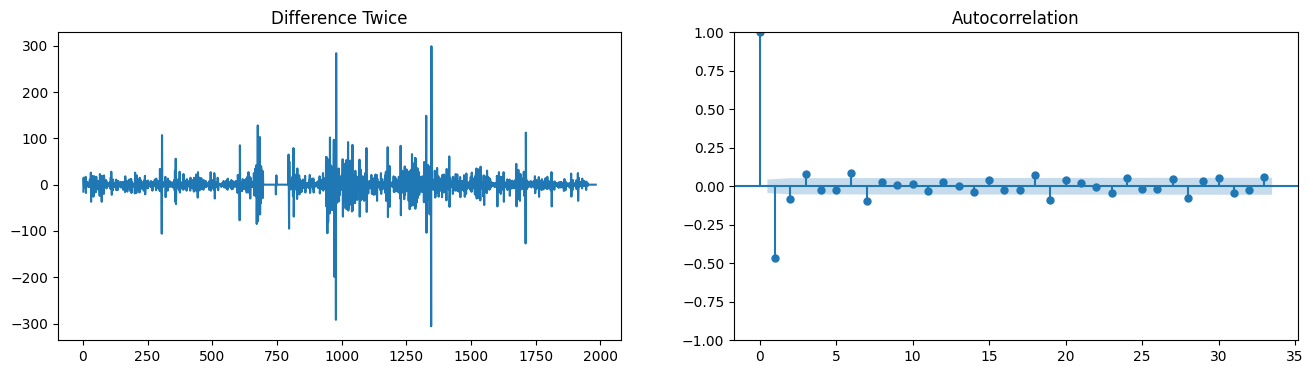

In [14]:
diff = data.Close.diff().diff().dropna()

fig ,(ax1,ax2) = plt.subplots(1,2,figsize=(16,4))
ax1.plot(diff)
ax1.set_title("Difference Twice")
plot_acf(diff,ax=ax2);

In [17]:
from pmdarima.arima.utils import ndiffs

In [18]:
ndiffs(data.Close,test ='adf')

1

In [21]:
from statsmodels.graphics.tsaplots import plot_pacf

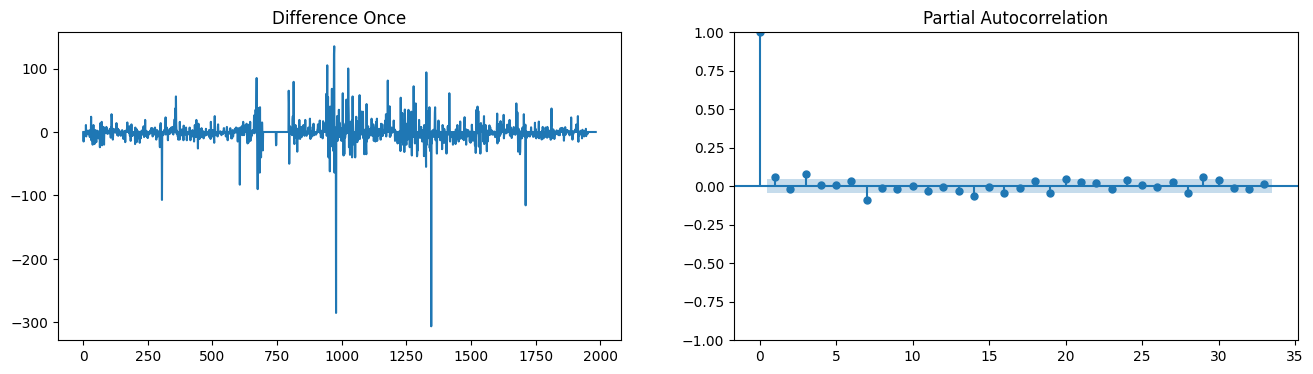

In [26]:
diff = data.Close.diff().dropna()

fig ,(ax1,ax2) = plt.subplots(1,2,figsize=(16,4))
ax1.plot(diff)
ax1.set_title("Difference Once")
ax2.set_ylim(0,1)
plot_pacf(diff,ax=ax2);

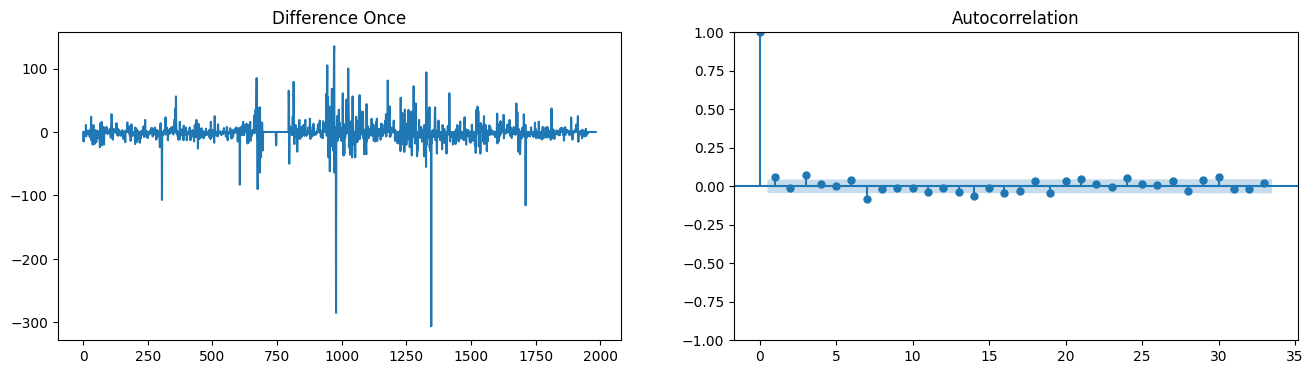

In [27]:
diff = data.Close.diff().dropna()

fig ,(ax1,ax2) = plt.subplots(1,2,figsize=(16,4))
ax1.plot(diff)
ax1.set_title("Difference Once")
ax2.set_ylim(0,1)
plot_acf(diff,ax=ax2);

In [32]:
from statsmodels.tsa.arima.model import ARIMA

In [35]:
model = ARIMA(data.Close,order=(3,1,1))
result = model.fit()

In [36]:
print(result.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1983
Model:                 ARIMA(3, 1, 1)   Log Likelihood               -8360.936
Date:                Mon, 09 Oct 2023   AIC                          16731.873
Time:                        21:54:51   BIC                          16759.832
Sample:                             0   HQIC                         16742.143
                               - 1983                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1889      0.186      1.018      0.309      -0.175       0.553
ar.L2         -0.0279      0.022     -1.292      0.196      -0.070       0.014
ar.L3          0.0786      0.017      4.533      0.0

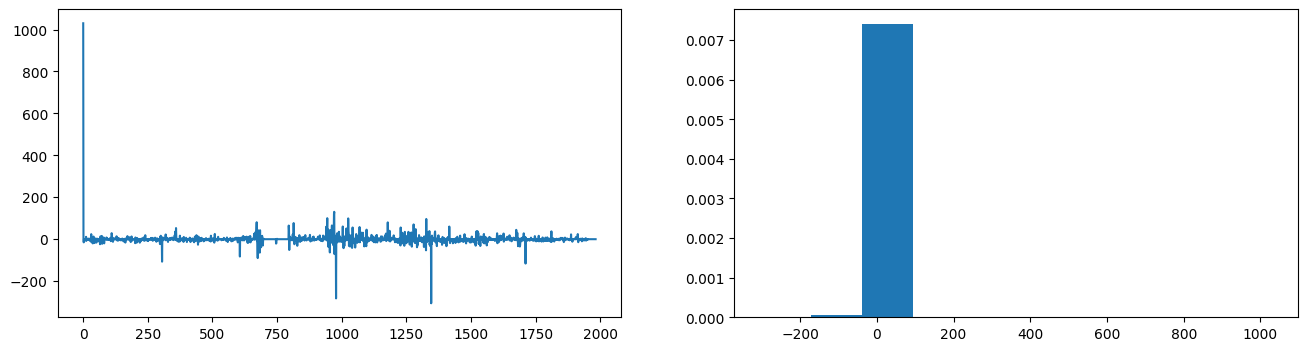

In [40]:
residuals=pd.DataFrame(result.resid)

fig ,(ax1,ax2) = plt.subplots(1,2,figsize=(16,4))

ax1.plot(residuals)
ax2.hist(residuals,density = True)
plt.show()

In [48]:
n= int(len(data)*0.8)
train= data.Close[:n]
test= data.Close[n:]

In [49]:
print(len(train))

1586


In [50]:
print(len(test))

397


In [53]:
model1 = ARIMA(train, order =(3,1,1))
result1= model1.fit()